<a href="https://colab.research.google.com/github/MicroPyscho/MicroPyscho/blob/main/ANN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from google.colab import drive
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from torch import nn

Load dataset and replace all +ve and -ve infinite values with NaN

In [ ]:
star_df = pd.read_csv("/content/drive/MyDrive/Star_df dataset").replace([np.inf, -np.inf], np.nan)

if "Unnamed: 0" in star_df.columns:
  star_df.drop(columns =["Unnamed: 0"], inplace=True)

Exclude all object dtype variable in preparation for ANN and CNN model

In [4]:
star_df = star_df.select_dtypes(exclude=['object'])

In [ ]:
star_df.head()

In [ ]:
star_df.shape

Replace any residual "-" in any variable with the mean of the variable column

In [ ]:
star_df.replace('-', pd.NA, inplace=True)
star_df = star_df.apply(pd.to_numeric, errors='coerce')
column_means = star_df.mean(skipna=True)
star_df.fillna(column_means, inplace=True)

print("Updated DataFrame:")
print(star_df)


Split the variables according to their dtypes and note them

In [ ]:
obj_cols = star_df.select_dtypes(include=['object'])

int_cols = star_df.select_dtypes(include=["int", "int64", "float", "float64"])

print("Object Columns:")
print(obj_cols.columns)
print("\nInteger Columns:")
print(int_cols.columns)


Do the same for all non-object dtype to note where they fall between "int", "int64", "float", "float64"

In [ ]:
obj_cols = int_cols.select_dtypes(include=['object'])

int_cols = int_cols.select_dtypes(include=["int", "int64", "float", "float64"])

print("Object Columns:")
print(obj_cols.columns)
print("\nInteger Columns:")
print(int_cols.columns)

In [ ]:
int_cols

#Random Forest Regression to predict AI Score

In [ ]:
# Assuming int_cols is your DataFrame with integer format ai_score
A = int_cols.drop(columns=["ai_score"])
B = int_cols["ai_score"]

# Splitting the data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

# Building the Random Forest regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(A_train, B_train)

# Feature importances
feature_importances = rf_regressor.feature_importances_

# Getting the top 50 features
top_50_indices = feature_importances.argsort()[-50:][::-1]
top_50_features = A.columns[top_50_indices]
top_50_importances = feature_importances[top_50_indices]

# Plotting the top 50 features
plt.figure(figsize=(20, 12))
plt.barh(top_50_features, top_50_importances)
plt.xlabel('Feature Importance')
plt.title('Top 50 Features Using Random Forest Regression')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.savefig('/content/to_50_RFReg.pdf')
plt.show()

# Predicting on the test set
B_pred = rf_regressor.predict(A_test)

# Creating a DataFrame to display actual and predicted values side by side
results_df = pd.DataFrame({'Actual': B_test, 'Predicted': B_pred})
print(results_df)

#KNN Classifier to predict AI Ranking

In [12]:
# Convert ai_ranking to integer format
int_cols['ai_ranking'] = int_cols['ai_ranking'].astype(int)

# Split the data into features (A) and target variable (B)
A = int_cols.drop(columns=["ai_ranking"])
B = int_cols["ai_ranking"]

# Split the data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn_classifier.fit(A_train, B_train)

# Predictions
y_pred_train = knn_classifier.predict(A_train)
y_pred_test = knn_classifier.predict(A_test)

# Evaluate the model
# Accuracy
train_accuracy = accuracy_score(B_train, y_pred_train)
test_accuracy = accuracy_score(B_test, y_pred_test)

# Classification report
train_classification_report = classification_report(B_train, y_pred_train)
test_classification_report = classification_report(B_test, y_pred_test)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

print("Train Classification Report:")
print(train_classification_report)

print("Test Classification Report:")
print(test_classification_report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Train Accuracy: 0.9971503974871687
Test Accuracy: 0.9959200634656794
Train Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5837
           2       1.00      1.00      1.00      1625
           3       1.00      1.00      1.00      1276
           4       1.00      1.00      1.00      1103
           5       1.00      1.00      1.00      1594
           6       1.00      1.00      1.00      2747
           7       1.00      1.00      1.00      2580
           8       1.00      1.00      1.00      1430
           9       1.00      1.00      1.00      2807
          10       1.00      1.00      1.00      1919
          11       1.00      1.00      1.00      1673
          12       1.00      1.00      1.00      3327
          13       1.00      1.00      1.00      3440
          14       0.96      0.99      0.97      2297
          15       1.00      1.00      1.00      2896
          16       1.00      1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

       Actual  Predicted
23139      21         21
32340      40         40
42613      12         12
81545       1          1
13436      19         19
...       ...        ...
27469       2          2
51995       6          6
85808      76         76
49963      10         10
56244      36         36

[26471 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

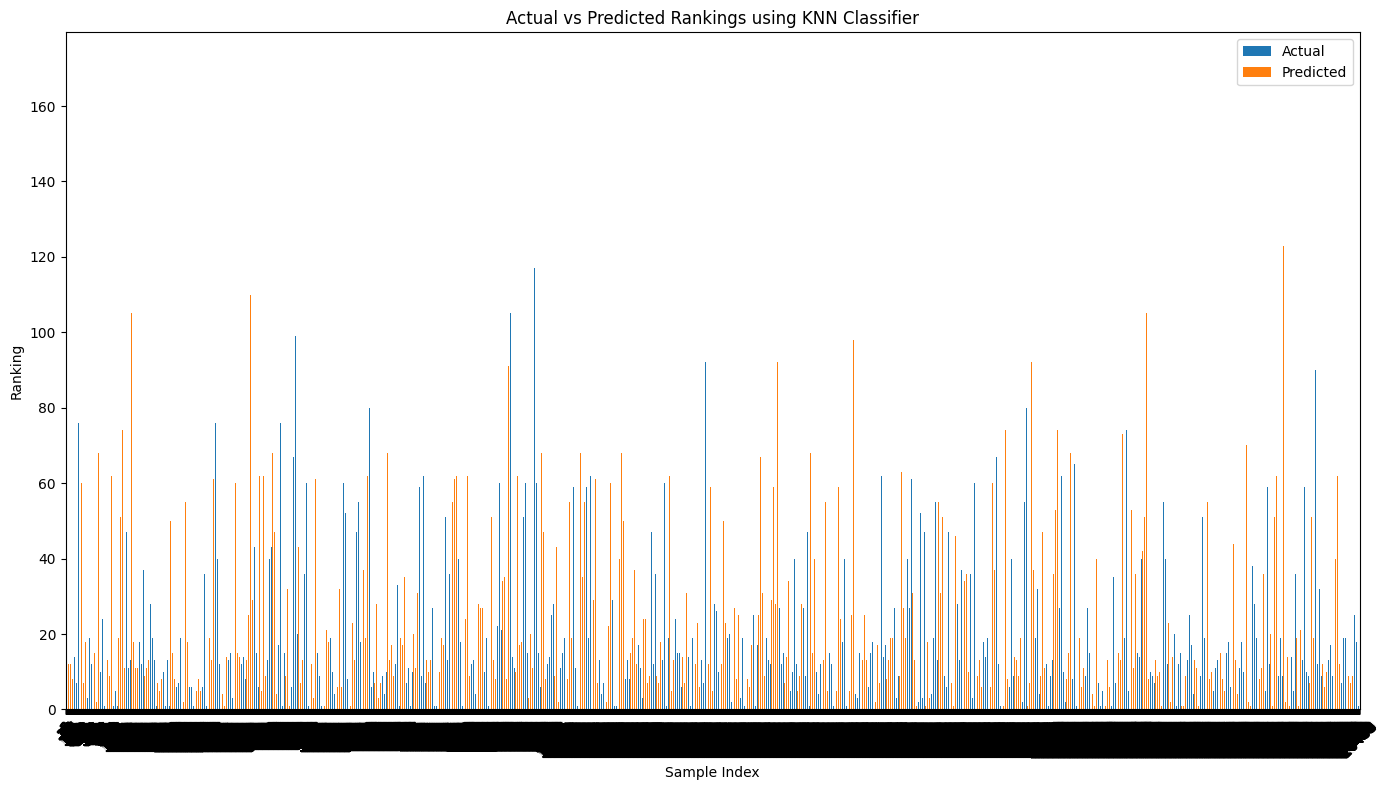

In [13]:
# Create a DataFrame with actual and predicted rankings
compard_df = pd.DataFrame({'Actual': B_test, 'Predicted': y_pred_test})

# Display the DataFrame
print(compard_df)

compard_df = pd.DataFrame({'Actual': B_test, 'Predicted': y_pred_test})

# Reset index to have numerical index
compard_df.reset_index(drop=True, inplace=True)

# Plot the actual and predicted rankings
plt.figure(figsize=(10, 6))
compard_df.plot(kind='bar', figsize=(14, 8))
plt.title('Actual vs Predicted Rankings using KNN Classifier')
plt.xlabel('Sample Index')
plt.ylabel('Ranking')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/actual_predicteed_KNNC.pdf')
plt.show()

In [ ]:
compard_df = pd.DataFrame({'Actual': B_test, 'Predicted': y_pred_test})

# Reset index to have numerical index
compard_df.reset_index(drop=True, inplace=True)

# Plot the actual and predicted rankings
plt.figure(figsize=(10, 6))
compard_df.plot(kind='bar', figsize=(14, 8))
plt.title('Actual vs Predicted Rankings')
plt.xlabel('Sample Index')
plt.ylabel('Ranking')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

Rank the top 50 important features for predicting AI Ranking

In [ ]:
# Define number of classes
num_classes = 5  # Adjust as needed

# Discretize the target variable into classes
B_train_discretized = np.digitize(B_train, np.arange(0, 101, 100/num_classes))
B_test_discretized = np.digitize(B_test, np.arange(0, 101, 100/num_classes))

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(A_train, B_train_discretized)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get indices of top 50 features
top_50_indices = feature_importances.argsort()[-50:][::-1]

# Get top 50 feature names
top_50_features = A_train.columns[top_50_indices]

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[top_50_indices], y=top_50_features)
plt.title('Top 50 Features Importance for AI Ranking Using KNN')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.savefig('/content/feat_importance_KNNC.pdf')
plt.show()


#ANN Model Prediction for AI Score

standardize dataset for ANN

In [ ]:
std_cols = (int_cols - int_cols.mean()) / int_cols.std()

scaler = StandardScaler()
scaled_cols = scaler.fit_transform(std_cols)
sstar_df = pd.DataFrame(scaled_cols, columns=std_cols.columns)

In [ ]:
X =std_cols.drop(columns=["ai_score"])
y = std_cols["ai_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1)  # No activation function for regression
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=36, validation_split=0.2, callbacks=[early_stopping])

# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/loss_plot.pdf')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
vy_test = y_test.values.reshape(-1, 1)
inv_ytest = scaler.inverse_transform(np.hstack((np.zeros((len(vy_test), std_cols.shape[1]-1)), vy_test)))

vy_pred = y_pred.reshape(-1, 1)
inv_ypred = scaler.inverse_transform(np.hstack((np.zeros((len(vy_pred), std_cols.shape[1]-1)), vy_pred)))

In [ ]:
y_testS = inv_ytest * int_cols['ai_score'].std() + int_cols['ai_score'].mean()
y_predS = inv_ypred * int_cols['ai_score'].std() + int_cols['ai_score'].mean()

comparison_df = pd.DataFrame({'Actual': y_testS.flatten(), 'Predicted': y_predS.flatten()})

# Step 3: Print/visualize the comparison
print(comparison_df)

#compare using a scatter plot
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatterplot of Actual vs Predicted AI Score using ANN ')
plt.savefig('/content/scatter_plot_ANN.pdf')
plt.show()

# compare using line plot
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual'], label='Actual', color='blue')
plt.plot(comparison_df['Predicted'], label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Lineplot of Actual vs Predicted AI Score using ANN')
plt.legend()
plt.savefig('/content/line_plot_ANN.pdf')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_testS, y_predS)

# Calculate MSE
mse = mean_squared_error(y_testS, y_predS)

# Calculate RMSE
rmse = mean_squared_error(y_testS, y_predS, squared=False)

# Calculate R-squared
r_squared = r2_score(y_testS, y_predS)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

In [ ]:
# Get the weights of the connections between the input layer and the first hidden layer
weights = model.layers[0].get_weights()[0]

# Calculate feature importance by summing the absolute weights for each feature
feature_importance = np.sum(np.abs(weights), axis=1)

# Get the indices of the top 50 features
top_50_indices = feature_importance.argsort()[-50:][::-1]

# Get the names of the top 50 features
top_50_features = X_train.columns[top_50_indices]

# Plot the feature importance
plt.figure(figsize=(15, 10))
plt.barh(range(len(top_50_features)), feature_importance[top_50_indices], align='center')
plt.yticks(range(len(top_50_features)), top_50_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Features Importance for AI Score Using ANN')
plt.gca().invert_yaxis()
plt.savefig('/content/top_50_ANN.pdf')
plt.show()


#Random Forest Regression Analysis for AI Score

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
feature_importances = rf_model.feature_importances_

# Getting the top 50 features
top_50_indices = feature_importances.argsort()[-50:][::-1]
top_50_features = X.columns[top_50_indices]
top_50_importances = feature_importances[top_50_indices]

# Plotting the top 50 features
plt.figure(figsize=(20, 16))
plt.barh(top_50_features, top_50_importances)
plt.xlabel('Feature Importance')
plt.title('Top 50 Features')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.savefig('/content/RF_top_50_ANN.pdf')
plt.show()

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Creating a DataFrame to display actual and predicted values side by side
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

#KNN Regression Analysis for AI Ranking

In [ ]:
A =std_cols.drop(columns=["ai_ranking"])
B = std_cols["ai_ranking"]

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size =0.3, random_state=42)

In [ ]:
print(B.shape)

In [ ]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn_regressor.fit(A_train, B_train)

# Predictions
y_pred_train = knn_regressor.predict(A_train)
y_pred_test = knn_regressor.predict(A_test)

# Evaluate the model
#RMSE
train_rmse = mean_squared_error(B_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(B_test, y_pred_test, squared=False)

#MAE
train_mae = mean_absolute_error(B_train, y_pred_train)
test_mae = mean_absolute_error(B_test, y_pred_test)

# R-squared
train_r2 = r2_score(B_train, y_pred_train)
test_r2 = r2_score(B_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R-squared: {train_r2}')
print(f'Test R-squared: {test_r2}')


In [ ]:
compare_df = pd.DataFrame({'Actual': B_test, 'Predicted': y_pred_test})
print(compare_df)

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted rankings
comparison_df = pd.DataFrame({'Actual': B_test, 'Predicted': y_pred_test})

# Reset index to have numerical index
comparison_df.reset_index(drop=True, inplace=True)

# Plot the actual and predicted rankings
plt.figure(figsize=(14, 8))

# Bar chart
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1
comparison_df.plot(kind='bar', ax=plt.gca())
plt.title('Actual vs Predicted Rankings')
plt.xlabel('Sample Index')
plt.ylabel('Ranking')
plt.xticks(rotation=45)

# Scatter plot with line
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2
plt.scatter(B_train, y_pred_train, label='Training data', color='blue', alpha=0.5)
plt.scatter(B_test, y_pred_test, label='Test data', color='red', alpha=0.5)
plt.plot([B_train.min(), B_train.max()], [B_train.min(), B_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for AI Ranking Using KNN Regression')
plt.savefig('/content/top_50_KNN_Regression.pdf')
plt.legend()

plt.tight_layout()

plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(B_train, y_pred_train, label='Training data', color='blue', alpha=0.5)
plt.scatter(B_test, y_pred_test, label='Test data', color='red', alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values for KNN Model')
plt.legend()
plt.show()

In [ ]:
# Calculate the absolute difference in predictions when a feature value is perturbed
train_feature_importances = np.mean(np.abs(knn_regressor.predict(A_train) - knn_regressor.predict(A_train.values + 0.01)), axis=0)
test_feature_importances = np.mean(np.abs(knn_regressor.predict(A_test) - knn_regressor.predict(A_test.values + 0.01)), axis=0)

# Get the indices of features sorted by importance
train_sorted_indices = train_feature_importances.argsort()[::-1]
test_sorted_indices = test_feature_importances.argsort()[::-1]

# Get the top 50 features and their importance scores
top_train_features = A_train.columns[train_sorted_indices][:50]
top_train_scores = train_feature_importances[train_sorted_indices][:50]

top_test_features = A_test.columns[test_sorted_indices][:50]
top_test_scores = test_feature_importances[test_sorted_indices][:50]

# Plot the top 50 features and their importance scores
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.barh(top_train_features, top_train_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 50 Features Importance - Train Data')
plt.gca().invert_yaxis()  # Invert y-axis to display in descending order

plt.subplot(2, 1, 2)
plt.barh(top_test_features, top_test_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 50 Features Importance - Test Data')
plt.gca().invert_yaxis()  # Invert y-axis to display in descending order

plt.tight_layout()
plt.show()
